# 00_first_small_eda

## Insights
- размечать самому частично, (возможно, когда разметка совпадает и не совпадает с какой-то автоматической разметкой)
- распределение длины не удалось свести к нормальному распределению через Бокс-Кокса, получилось распредление с 2 модами, возможно говорит о том, что можно разложить на несколько распределений 
- сами тексты состоят из нескольких тематик (топиков)

 ##  Типы задач, которые можно решать с данными отзывыми

1. Классификация отзывов  
Определение тональности (Sentiment Analysis) – классификация отзывов на положительные, отрицательные и нейтральные.
Категоризация по степени негатива – например, деление на умеренно негативные, сильно негативные, критические.
Определение эмоциональной окраски – можно выявлять эмоции (гнев, разочарование, радость, сарказм).
Температурная шкала негодования – можно построить ранжирование негативных отзывов от "небольшие недочёты" до "полный ужас".
---
2. Тематическое моделирование (Topic Modeling)  
Выявление тем в отзывах:  
Еда  
Чистота  
Персонал  
Заселение и администрирование  
Бассейн и инфраструктура  
Качество сна (постельное бельё, тишина и т.д.)  
Цены и возвраты денег  
Можно использовать LDA, BERTopic, Top2Vec, чтобы определить скрытые темы в отзывах.
---
3. Извлечение ключевых проблем (Aspect-Based Sentiment Analysis)  
Определение аспектов (еда, сервис, номера, заселение) и оценка их по тональности.
Например:  
Сервис – отрицательный  
Еда – крайне отрицательный  
Инфраструктура – умеренно отрицательный 
--- 
4. Выявление аномалий и жалоб  
Определение критических проблем, требующих немедленного реагирования (например, отравление, грязь, обман с деньгами).  
Автоматическое извлечение фраз вроде "потребовали вернуть деньги", "грязная посуда", "заселили не вовремя".
---  
5. Генерация кратких саммаризаций (Text Summarization)  
Можно использовать TextRank, BART, T5, чтобы автоматически сжимать длинные отзывы до коротких выжимок: "Проблемы с заселением, грязные номера, плохая еда, отсутствие сервиса, отказ в возврате денег." 
--- 
6. Автоматизация модерации и отзывов  
Обнаружение нецензурной лексики, сарказма, чрезмерной эмоциональности.  
Проверка на фактологическую достоверность (есть ли слова, намекающие на ложные обвинения).  
Фильтрация спам-отзывов (например, копипаст нескольких отзывов с разных аккаунтов).
---
7. Поиск похожих отзывов  
Можно делать кластеризацию отзывов и находить похожие.  
Если один гость жалуется на отсутствие подушек, можно проверить, есть ли другие отзывы с аналогичной проблемой. 
--- 
8. Определение влияния отзыва на репутацию  
Можно анализировать, какие негативные факторы чаще всего встречаются и формируют имидж отеля.  
Оценивать, насколько длинный и эмоциональный отзыв потенциально влияет на будущих клиентов.
---  
9. Определение трендов и динамики качества сервиса  
Если датасет содержит временные метки, можно отслеживать, ухудшается ли сервис со временем.  
Можно предсказать, какие проблемы могут повлиять на рейтинг отеля.
---  
10. Автоматическое создание ответа на отзыв  
Можно генерировать автоматические ответы, адаптированные под конкретные жалобы.  
Пример: Жалоба:  
"Грязная посуда, неубранный номер, нет подушек. Верните деньги!" Ответ (AI):  
"Благодарим за отзыв. Нам жаль, что у вас был такой опыт. Мы уже усилили контроль за уборкой и работаем над улучшением сервиса. Пожалуйста, свяжитесь с нами для урегулирования вопроса о возврате." 
--- 
11. Анализ конкурентной среды  
Если собрать отзывы о разных отелях, можно понять:  
В чем  условному "Балтийцу" проигрывает конкурентам.  
Какие проблемы уникальны для него.  
Какие аспекты сервиса нужно улучшить, чтобы не терять клиентов.  

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import logging
from collections import Counter
import re
from pathlib import Path

## Initialization

In [2]:
pd.set_option("display.max_colwidth", None)

plt.style.use("classic")

In [4]:
PROJECT_NAME = "finam_text_classification"

# Get the current working directory
current_dir = Path.cwd()


# Traverse up to find "finam_text_classification" folder
project_root = current_dir
while project_root.name != PROJECT_NAME:
    if project_root.parent == project_root:  # Reached the filesystem root
        raise FileNotFoundError("The 'finam_text_classification' folder was not found.")
    project_root = project_root.parent

# Define the path to the input data relative to the project root
PTH_TO_INPUT_DATA = project_root / "data" / "raw" / "Test_data_marked.xlsx"

## Read raw data

In [5]:
# Read data
try:
    # Use Path to check if the file exists
    if PTH_TO_INPUT_DATA.exists():
        # Read the Excel file
        df_raw = pd.read_excel(PTH_TO_INPUT_DATA)
        logging.info("File successfully loaded.")
    else:
        # Log an error if the file is not found
        logging.error(f"File not found: {PTH_TO_INPUT_DATA}")
except Exception as e:
    # Log any exceptions that occur
    logging.error(f"An error occurred: {e}")

## First look at the data

Выводы:
- отзывов достаточно, не много и не мало
- отзывы о разных отелях

In [6]:
df_raw.shape

(6876, 2)

In [13]:
# Посмотрим начальные 5 отзывов
df_raw.head(5)

,review_id,review_text
0,1,Элегантный отель в самом центре Дубай. Красивые и стильные номера. И жуткие цены) До посещения отеля рекомендуется ограбить банк или неожиданно разбогатеть)))Это пишу чтобы набрать 200 символов))))))
1,2,"Если стиль вашей поездки в Дубай-- это шоппинг в Дубай молле, созерцание фонтана и гастрономический ужин-- не пожалейте денег ""усилить"" все эти ощущения номером с видом на фонтан в отеле Armani. Это просто супер. Номера находятся на нижних этажах Burj Khalifa, поэтому вид на фонтан оттуда точно лучше, чем с улицы около, и даже лучше, чем с крыши этого замечательного здания. Лучше, чем из ресторана... В общем-- самый лучший. Я прямо будильник заводил и выходил смотреть фонтан на балкон (представления меняются в течение вечера). На балконах можно курить, что не может не радовать не расставшихся с этой привычкой. Но такие номера продают только на сайте самого отеля-- у перекупщиков типа booking.com их нет. В номере мы увидели реально работающий, удобный и функциональный ""умный дом""-- управление всей электроникой номера с iPad mini. Дизайн-- не просто привлекательный и интересный, но и очень функциональный. Сервис-- честные 5* Grand Luxe, мальчик на этаже, любой вопрос решается моментально, все очень быстро и ненавязчиво. Шоппинг: до Дубай Молла идет галерея. Ребята-сотрудники отеля помогут понести сумки и даже за вас их в отель отнесут, если не боитесь доверять ценный груз)) Смотровая площадка: билет продается без очереди прямо в отеле, но чтобы попасть на нее надо 2 раза пройти по галерее: туда и обратно, так как контроль безопасности находится со стороны Дубай молла. Ресторан-- не нашли к чему придраться, все вкусно, сервис прекрасный. Общий вывод: если опять окажемся в Дубае транзитом-- без вариантов, снова сюда."
2,3,"Провели с супругой там уик енд. Брали самый люкс с видом на фонтаны. Все было на уровне. Отличный панорамный вид на фонтаны. Номера шикарные просторные стильные. Во всем чувствуется качество и люкс. К номеру бесплатно предоставили бентли с водителем. Завтраки отличные , безупречное спа, прекрасный фитнес, во общем недостатков нет, кроме того что отель городской и моря рядом нет. Ну и маленький бассейн."
3,4,"По дороге домой для того, чтобы перекантоваться во время пересадки на рейс до МСк, и в качестве сюрприза для молодой жены был выбран именно этот отель. Списался с ними еще в Азии предупредил о сюрпризе. Все было организовано на высочайшем уровне, начиная с наших первых шагов в аэропорту. Так получилось, что забыл костюм в кабине самолета, наш встречающий в аэропорту от отеля сказал не париться и сам организовал и поиски, и доставку костюма в отель... Вез к отелю нас шикарный БЕНТЛИ, включено в стоимость номера, а в самом номере ждал сладкий сюрприз. Определенно - очень грамотно организованный персонал, прием и сам отель... При необходимости Ваш менеджер организует билеты со скидкой на экскурсию в башню на любое удобное для Вас время и расскажет/подскажет все что Вы хотите посмотреть в городе... Удачи и приятного отдыха..."
4,5,"меня впечатлили размеры! самый огромный номер, в котором я когда либо жил! отличное обслуживание! не понравился вид за окном, далековато от центра. в номерах очень сильное охлождение - можно и по мягче кондиционеры устанавливать."


In [14]:
# Посмотрим случайные 5 отзывов
df_raw.sample(n=5)

,review_id,review_text
1193,1194,"Останавливались с мужем в этом отеле с 20.11.13 по 24.11.13 за 27 тыс, что оказалось дорого и эта цена не соответствует качеству. Ремонт конечно свежий. Номер точь-в-точь как на первой картинке. Но отель очень узкий, маленький лифт. В номере присутствует неприятный запах, со временем привыкаешь. Два балкона: один в комнате, другой в ванной. Ванная комната компактная: душ, раковина, унитаз. Душ протекает, очень сильно работает вентиляция, от этого очень холодно. Приносили мыло и шампунь/гель для душа ( 2 в одном) не каждый день, хотя на картинке большой выбор мыльно-рыльных, которые мы так и не увидели. Самое большое разочарование - ЭТО ГРЯЗНЫЕ ПОЛОТЕНЦА!!!!!! волосы торчат черные ( у меня светлые), пятна темные, и даже пятна от не отстиравшейся крови! Фу! Позор! Сейфа нет, wi-fi есть, русских каналов нет.Завтрак не брали."
228,229,"Отель очень современный, отелка на уровне. персоонал приветливый.Много сервисов, территоря огромная.Номера большие, окна французские. Просто замечательно проснуться и смотреть на море во время восхода солнца."
432,433,"Приезжали во второй раз, все впечатления только позитивные. Это тот отель, в который хочется вернуться еще раз. Отдыхали в августе, были удивлены водорослями и обмелевшим морем, может это временные неудобства..."
4452,4453,"Неожиданно уютный отель. Он небольшой, но достаточный по оснащению и очень комфортный. Приветливый персонал, чистые номера, вкусный завтрак., хорошее меню на ужин - впечатления самые приятные. Кроме того, он удачно расположен."
4005,4006,"Мы выбирали гостиницу, которая находилась бы недалеко от место проведения переговоров, Введенский подошел идеально. Номер просторный, есть кондиционер, в ванной можно найти шампунь и гель для душа, на журнальном столике комплимент от гостиницы: блюдо с фруктами и две бутылки негазированной воды. На завтрак вкусный шведский стол и шампанское брют по желанию. Очень дружелюбные сотрудники отеля, говорящие по английски и готовые помочь во всем. Из недостатков можно отметить длину кровати - 190."


## Качественные и количественные характеристики сырых данных

In [17]:
# Check for missing values
print("Missing values per column:")
display(df_raw.isnull().sum())

Missing values per column:


review_id      0
review_text    0
dtype: int64

In [18]:
# Basic information about the dataset
print("\nBasic Info:")
df_raw.info()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    6876 non-null   int64 
 1   review_text  6876 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.6+ KB


In [8]:
# Review text length analysis
df_raw["review_length"] = df_raw["review_text"].apply(len)
print("\nReview text length statistics:")
print(df_raw["review_length"].describe())


Review text length statistics:
count     6876.000000
mean       608.571553
std        582.506992
min         55.000000
25%        275.000000
50%        433.000000
75%        713.250000
max      14414.000000
Name: review_length, dtype: float64


Вывод: 
- максимум очень сильно длинный, возможно стоит удалить как выбросы

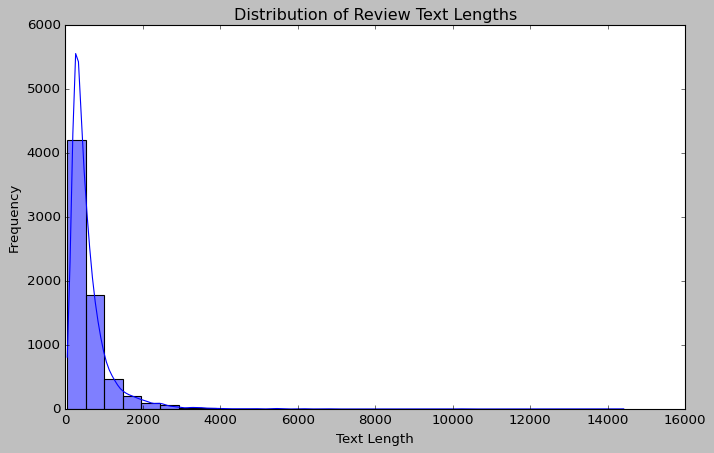

In [34]:
# Distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_raw["review_length"], bins=30, kde=True)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

### Анализ на выборосы

In [19]:
upper_bound = df_raw["review_length"].quantile(0.9991)
(df_raw[df_raw["review_length"] > upper_bound]).sample(5)

review_id  \
4773       4774   
377         378   
355         356   
500         501   
6436       6437   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [26]:
# Посмотрим на короткие отзывы
lower_bound = df_raw["review_length"].quantile(0.001)
df_raw[(df_raw["review_length"] < lower_bound)].sample(5)

,review_id,review_text,review_length
123,124,Новый бизнес отель идеально расположен для тех кто приехал посетить выставки в районе WTC,89
718,719,"Прекрасный отель для отдыха, отличный персонал,хорошая уборка,вкусные завтраки",78
335,336,"Отель хороший,относительно новый...соотношение цена-качество! :)",64
833,834,Какое хорошое обслуживание! Самое лучше место в Париже!,55
3254,3255,Часто летаю в Питер .могу сказать этот отель соответствует цена-качество.,73


In [29]:
from scipy.stats import boxcox
import numpy as np

# Применить Бокс-Кокс к длинам отзывов
df_raw["review_length_bc"], lambda_bc = boxcox(df_raw["review_length"])

print(f"Параметр лямбда для Бокс-Кокса: {lambda_bc}")

Параметр лямбда для Бокс-Кокса: -0.464091988684512


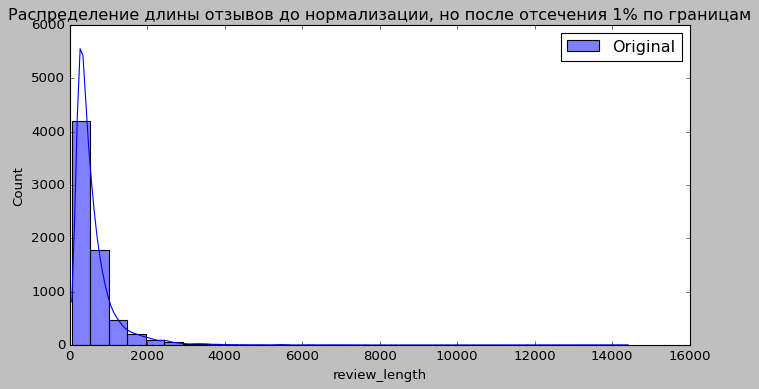

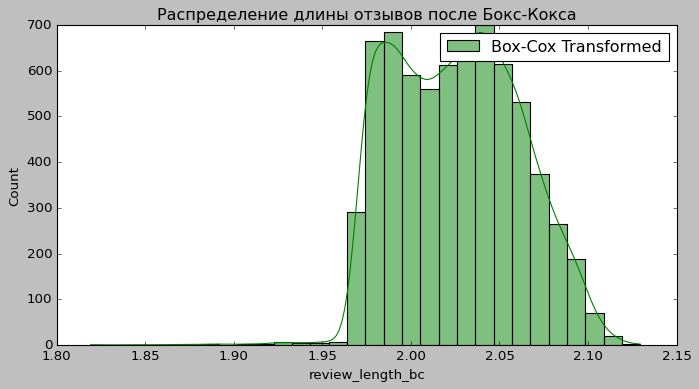

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Исходное распределение
plt.figure(figsize=(10, 5))
sns.histplot(df_raw["review_length"], bins=30, kde=True, color="blue", label="Original")
plt.title("Распределение длины отзывов до нормализации, но после отсечения 1% по границам")
plt.legend()
plt.show()

# После Бокс-Кокса
plt.figure(figsize=(10, 5))
sns.histplot(df_raw["review_length_bc"], bins=30, kde=True, color="green", label="Box-Cox Transformed")
plt.title("Распределение длины отзывов после Бокс-Кокса")
plt.legend()
plt.show()

Наблюдение 1: 
- Оригинальное распределение длины отзывов имеет сильный  перекос (сильно скошенное распределение), где большая часть отзывов короткая (до 500 символов), а более длинные отзывы встречаются реже.
Инсайт:
- Короткие отзывы доминируют, что может указывать на стремление пользователей выражать свои мысли лаконично.
Возможны случаи, когда длинные отзывы дают больше деталей и контекста, что потенциально делает их более ценными для классификации.

Наблюдение 2: 
- На оригинальном графике можно заметить, что небольшая часть отзывов имеет экстремально большую длину (>2500 символов), что может быть результатом аномалий (например, скопированные статьи или несвязанный текст).
Инсайт:
- Эти выбросы нужно учитывать, так как они могут искажать результаты анализа. Отсечение 0.5%-1% сверху уже помогло сделать данные более "чистыми".
Для длинных отзывов можно провести дополнительный анализ, чтобы понять, содержат ли они больше информации или просто шум.

## Первый разведочный анализ самых часто встречаемых слов

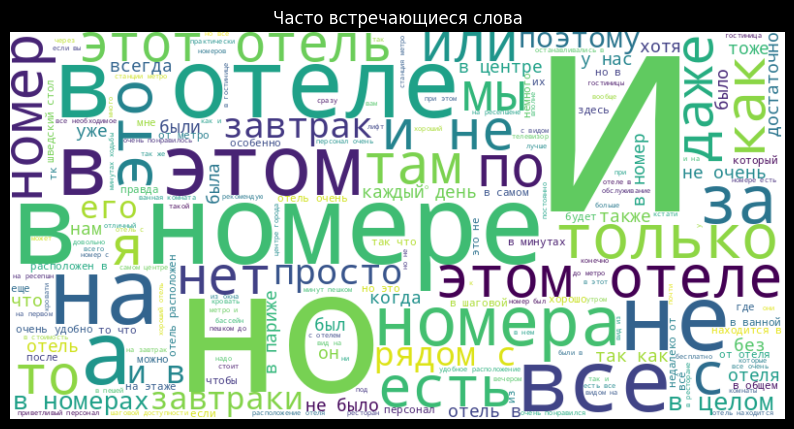

In [29]:
# Most common words (WordCloud)
def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text


# Combine all review texts into one string
all_text = " ".join(df_filtered_99["review_text"].apply(preprocess_text))

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Часто встречающиеся слова")
plt.show()

In [32]:
# Most common words (without stopwords)
word_list = all_text.split()
word_counts = Counter(word_list)
most_common_words = word_counts.most_common(30)
print("\nMost Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most Common Words:
в: 24896
и: 20450
на: 12025
не: 10920
с: 8216
очень: 7345
отель: 5672
но: 5533
что: 4781
все: 4109
для: 3839
по: 3564
номер: 3293
до: 3096
номера: 2963
от: 2960
есть: 2955
это: 2856
отеля: 2777
отеле: 2679
за: 2528
из: 2410
персонал: 2404
было: 2367
метро: 2363
номере: 2337
можно: 2248
как: 2205
а: 2179
мы: 2150
